In [70]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [71]:
import numpy as np
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt

In [72]:
X = np.array([
#    0  1  2  3  4  5  6  7  8
    [0, 1, 1, 0, 0, 1, 1, 0, 0], # 3
    [1, 0, 0, 1, 0, 1, 0, 1, 0], # 4
    [1, 1, 0, 0, 0, 1, 0, 1, 1], # 5
    [1, 1, 1, 1, 1, 1, 1, 1, 1]  # 8
])

In [73]:
y = np.array([
    [1,0,0,0], # 1
    [0,1,0,0], # 2
    [0,0,1,0], # 3
    [0,0,0,1]  # etc
])

In [74]:
def create_model():
    d_model = models.Sequential()

    d_model.add(layers.Input(shape=(9,)))
    d_model.add(layers.Dense(16, activation='relu'))
    d_model.add(layers.Dense(8, activation='relu'))
    d_model.add(layers.Dense(4, activation='softmax'))

    d_model.compile(loss='mse', optimizer='adam', metrics=['mse'])

    return d_model

In [75]:
target_mse = 0.01
final_loss = 1.0
all_losses = []
n_epochs = 100

c_model = create_model()

while final_loss > target_mse:
    history = c_model.fit(X, y, epochs=n_epochs, verbose=0)
    final_loss = history.history['loss'][-1]
    all_losses = history.history['loss']
    print(f"Epochs: {n_epochs}    MSE: {final_loss:.4f}")
    n_epochs += 100

Epochs: 100    MSE: 0.1118
Epochs: 200    MSE: 0.0059


In [76]:
loss, acc = c_model.evaluate(X, y, verbose=0)
print("Помилка: ", loss)
print("Точність: ", acc)

Помилка:  0.005814831703901291
Точність:  0.005814831703901291


In [77]:
predictions = c_model.predict(X)
print(np.round(predictions, 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
[[0.88 0.04 0.03 0.05]
 [0.01 0.93 0.01 0.05]
 [0.04 0.02 0.84 0.1 ]
 [0.02 0.07 0.06 0.85]]


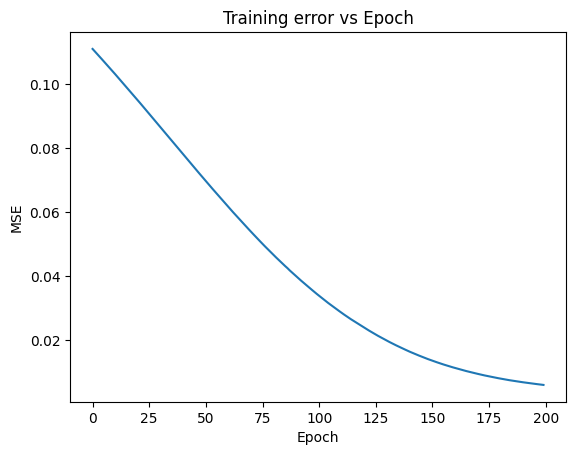

In [78]:
plt.plot(all_losses)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training error vs Epoch')
plt.show()